# **Problema de los Tres Cuerpos en Mecánica Newtoniana**

## **Análisis Teórico**

Consideremos tres cuerpos de masas $m_1$, $m_2$ y $m_3$ que interactúan gravitacionalmente según la ley de gravitación universal de Newton.  

### **Ley de Gravitación Universal y Fuerzas**  
La fuerza gravitacional que ejerce el cuerpo $j $ sobre el cuerpo $i$ es:  

$$\mathbf{F}_{ij} = G \frac{m_i m_j}{r_{ij}^3} \mathbf{r}_{ij},$$

donde:  
- $\mathbf{r}_{ij} = \mathbf{r}_j - \mathbf{r}_i$ (vector de posición relativa),  
- $r_{ij} = \|\mathbf{r}_{ij}\|$ (distancia entre cuerpos $i$ y $j$),  
- $G$ es la constante gravitacional.  

### **Ecuaciones de Movimiento**  
La aceleración del cuerpo $i$ debido a las interacciones con los otros dos cuerpos es:  

$$\frac{d^2 \mathbf{r}_i}{dt^2} = G \left( \frac{m_j (\mathbf{r}_j - \mathbf{r}_i)}{r_{ij}^3} + \frac{m_k (\mathbf{r}_k - \mathbf{r}_i)}{r_{ik}^3} \right).$$

Para los tres cuerpos, el sistema de ecuaciones diferenciales de segundo orden es:  

$$
\begin{cases}
\frac{d^2 \mathbf{r}_1}{dt^2} = G \left( \frac{m_2 (\mathbf{r}_2 - \mathbf{r}_1)}{r_{12}^3} + \frac{m_3 (\mathbf{r}_3 - \mathbf{r}_1)}{r_{13}^3} \right), \\
\frac{d^2 \mathbf{r}_2}{dt^2} = G \left( \frac{m_1 (\mathbf{r}_1 - \mathbf{r}_2)}{r_{12}^3} + \frac{m_3 (\mathbf{r}_3 - \mathbf{r}_2)}{r_{23}^3} \right), \\
\frac{d^2 \mathbf{r}_3}{dt^2} = G \left( \frac{m_1 (\mathbf{r}_1 - \mathbf{r}_3)}{r_{13}^3} + \frac{m_2 (\mathbf{r}_2 - \mathbf{r}_3)}{r_{23}^3} \right).
\end{cases}
$$

### **Reducción a un Sistema de Primer Orden**  
Para resolver numéricamente, transformamos las ecuaciones de segundo orden en un sistema de primer orden.  

Definimos:  
- **Posición**: $\mathbf{r}_i = (x_i, y_i, z_i)$,  
- **Velocidad**: $\mathbf{v}_i = (v_{xi}, v_{yi}, v_{zi})$.  

El sistema de primer orden para cada cuerpo $i$ es:  

$$
\begin{cases}
\frac{d\mathbf{r}_i}{dt} = \mathbf{v}_i, \\
\frac{d\mathbf{v}_i}{dt} = G \left( \frac{m_j (\mathbf{r}_j - \mathbf{r}_i)}{r_{ij}^3} + \frac{m_k (\mathbf{r}_k - \mathbf{r}_i)}{r_{ik}^3} \right).
\end{cases}
$$

En total, hay **18 ecuaciones** (3 cuerpos $\times$ 6 variables cada uno: 3 posiciones + 3 velocidades).  

### **Formulación Adimensional**  
Usando unidades naturales:  
- Longitud: $a$ (distancia característica, e.g., distancia inicial media),  
- Masa: $M$ (masa característica, e.g., $M = m_1 + m_2 + m_3$),  
- Tiempo: $\tau = \sqrt{\frac{a^3}{G M}}$.  

Variables adimensionales:  
$$
\tilde{\mathbf{r}}_i = \frac{\mathbf{r}_i}{a}, \quad \tilde{\mathbf{v}}_i = \frac{\mathbf{v}_i \tau}{a}, \quad \tilde{t} = \frac{t}{\tau}, \quad \tilde{m}_i = \frac{m_i}{M}.
$$

Ecuaciones adimensionales:  
$$
\begin{cases}
\frac{d\tilde{\mathbf{r}}_i}{d\tilde{t}} = \tilde{\mathbf{v}}_i, \\
\frac{d\tilde{\mathbf{v}}_i}{d\tilde{t}} = \sum_{j \neq i} \frac{\tilde{m}_j (\tilde{\mathbf{r}}_j - \tilde{\mathbf{r}}_i)}{\tilde{r}_{ij}^3}.
\end{cases}
$$
### **Implementación Numérica**  
El método de **Runge-Kutta de cuarto orden (RK4)** resuelve:  

$$\frac{d\mathbf{Y}}{dt} = \mathbf{f}(t, \mathbf{Y}),$$

donde $\mathbf{Y} = [x_1, y_1, z_1, v_{x1}, v_{y1}, v_{z1}, \dots, x_3, y_3, z_3, v_{x3}, v_{y3}, v_{z3}]^T$.  

Cada paso de RK4 calcula:  

$$
\begin{aligned}
\mathbf{k}_1 &= \Delta t \, \mathbf{f}(t_n, \mathbf{Y}_n), \\
\mathbf{k}_2 &= \Delta t \, \mathbf{f}(t_n + \Delta t/2, \mathbf{Y}_n + \mathbf{k}_1/2), \\
\mathbf{k}_3 &= \Delta t \, \mathbf{f}(t_n + \Delta t/2, \mathbf{Y}_n + \mathbf{k}_2/2), \\
\mathbf{k}_4 &= \Delta t \, \mathbf{f}(t_n + \Delta t, \mathbf{Y}_n + \mathbf{k}_3), \\
\mathbf{Y}_{n+1} &= \mathbf{Y}_n + \frac{1}{6}(\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4).
\end{aligned}
$$

### **Conservación de la Energía y Momento Angular**  
La energía total del sistema debe conservarse:  

$$E_{tot} = \sum_{i=1}^3 \frac{1}{2} m_i v_i^2 - G \sum_{i < j} \frac{m_i m_j}{r_{ij}}$$

El momento angular total también se conserva:  

$$\mathbf{L} = \sum_{i=1}^3 m_i \mathbf{r}_i \times \mathbf{v}_i$$

Esta formulación proporciona el marco teórico completo para simular el problema de los tres cuerpos mediante integración numérica.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from three_body_system import ThreeBodySystem, ThreeBodySimulator
from plotting import load_simulation_data, plot_energy_momentum, plot_3d_trajectories, plot_relative_distances

In [ ]:
masses = [1.9885e30, 5.972e24, 7.342e22 * 50]  # Sol Tierra Lunax50

UA = 1.496e11
initial_positions = [
    [0.0, 0.0, 0.0],                      # Sol
    [UA, 0.0, 0.0],                       # Tierra en 1 UA
    [UA + 3.844e8, 0.0, 3.844e8]          # Luna con inclinación 45°
]

initial_velocities = [
    [0.0, 0.0, 0.0],                      # Sol fijo
    [0.0, 12.0e3, 0.0],                   # Tierra a 50% de su velocidad orbital
    [0.0, 12.0e3 + 10.0e3, 15.0e3]        # Luna con velocidad oblicua extrema
]

dt = 3600 * 6  # 6 horas 
t_max = 86400 * 30 * 12 * 5  # 12 meses 
filename = "sun_earth_moon_test"

In [47]:
system = ThreeBodySystem(
        masses=masses,
        initial_positions=initial_positions,
        initial_velocities=initial_velocities
    )
simulator = ThreeBodySimulator(system, filename)
simulator.simulate(t_max, dt)

Simulación completada. Datos guardados en data/sun_earth_moon_test.dat


In [48]:
simdata = load_simulation_data(filename=filename)
x1, y1 = simdata["x1"], simdata["x2"]
x2, y2 = simdata["x2"], simdata["x2"]
x3, y3 = simdata["x3"], simdata["x3"]


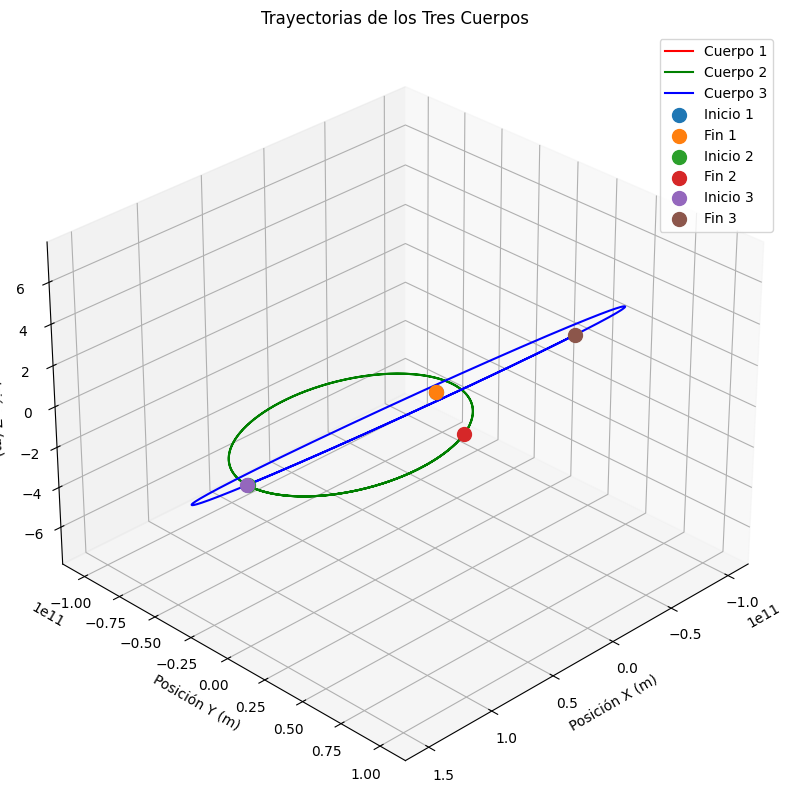

In [49]:
plot_3d_trajectories(data=simdata, show=True, save=False)